# Demonstration of Iterated Function Systems
An IFS is a set of functions that will converge to a set when iterated. This set is called the 'attractor' set, because the points that are generated from iteration behave as a basin of attraction. For more information on fractals and IFS, see Barnsley's *Fractals Everywhere*.

The IFS module uses a method of generating random samples called inverse transform sampling. This is a way to sample from an arbitrary probability distribution, assuming access to a function that can generate uniformly random samples in [0,1]. This method is relatively intuitive and does not require many lines of code.

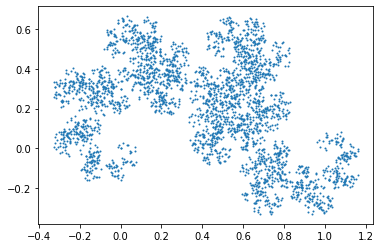

In [1]:
import ifs 
from matplotlib import pyplot as plt

# Return list of matrices, shifts, and probabilities for an IFS
A,T,p = ifs.get("dragon")
# Choose how many points to plot
numpoints = 3000
# Return array of shape (numpoints, 2)
z = ifs.rand(A,T,p,numpoints=numpoints,z0=0)
# Generate a scatter plot
plt.scatter(z[:,0],z[:,1],s=1)

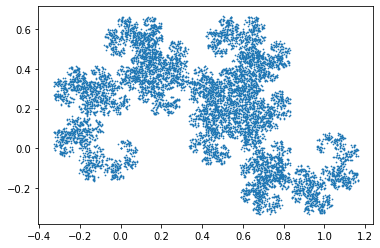

In [2]:
# Increase the number of points for a denser set
A,T,p = ifs.get("dragon")
numpoints = 10000
z = ifs.rand(A,T,p,numpoints=numpoints,z0=0)
plt.scatter(z[:,0],z[:,1],s=0.5)

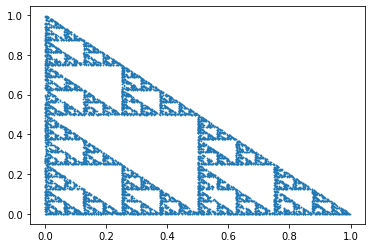

In [3]:
A,T,p = ifs.get("sierpinski")
numpoints = 10000
z = ifs.rand(A,T,p,numpoints=numpoints,z0=0)
plt.scatter(z[:,0],z[:,1],s=0.5)

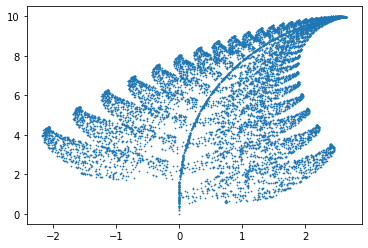

In [4]:
A,T,p = ifs.get("fern")
numpoints = 10000
z = ifs.rand(A,T,p,numpoints=numpoints,z0=0)
plt.scatter(z[:,0],z[:,1],s=0.5)

# Augmentation
It is possible to create a custom IFS with different matrices, shifts, or probabilities.
It is also possible to augment an IFS using a constant shift or rotation to the initial structure

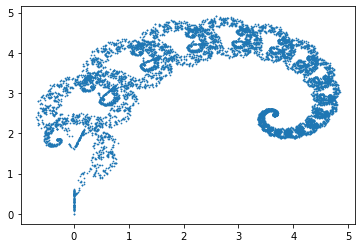

In [5]:
from numpy import sin,cos,pi

A,T,p = ifs.get("fern")
# Generate a rotation matrix
R = 0*A[0]
# Amount of rotation to use
theta = pi/10
# Standard form for a 2D rotation
R[:,0] = [cos(theta),-sin(theta)]
R[:,1] = [sin(theta),cos(theta)]
# Recreate the list of A matrices with rotations in a concise Pythonic one-liner
A = [a @ R for a in A]

numpoints = 10000
z = ifs.rand(A,T,p,numpoints=numpoints,z0=0)
plt.scatter(z[:,0],z[:,1],s=0.5)

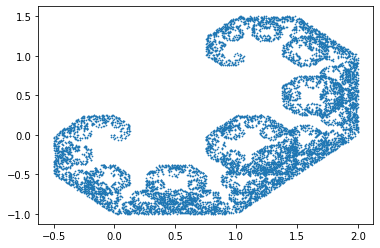

In [6]:
# Rotate the dragon by pi/2 to make another well-known fractal, the 'Cesaro curve'
A,T,p = ifs.get("dragon")
R = 0*A[0]
theta = pi/2
R[:,0] = [cos(theta),-sin(theta)]
R[:,1] = [sin(theta),cos(theta)]
A = [a @ R for a in A]

numpoints = 10000
z = ifs.rand(A,T,p,numpoints=numpoints,z0=0)
plt.scatter(z[:,0],z[:,1],s=0.5)

# Inverse Transform Sampling speed test
For details on the speed test, see itstest.py

In [7]:
from itstest import *



------Test for speed of inverse transform sampling (ITS) vs. choice------



Running 100000 function calls to average generating samples from a distribution of size  1000
Average time to compute using its.sample(): 5.1158449649810794e-05
Average time to compute using choice(): 1.553971290588379e-05
ITS is faster by a factor of  3.2921103471892783



